In [41]:
import pandas as pd


In [42]:
# Specify the file path
file_path = "master_updated.xlsx"  # Replace with your actual file path

# Read the Excel file into a DataFrame
try:
    df = pd.read_excel(file_path)
    print("Excel file loaded successfully!")
    print(df.head())  # Display the first few rows of the DataFrame
except FileNotFoundError:
    print(f"File not found: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Excel file loaded successfully!
  Metal  MP(gr)  Residuo (gr)  Eficacia (BS)  Eficacia (BL)  \
0    Mg   1.230       0.07684          93.75          74.63   
1    Mn  10.850       3.32220          69.38          53.22   
2    Al   1.070       0.19210          82.05          62.29   
3    Zn   7.700       0.25990          96.62         124.68   
4    Fe   0.785       0.44748          43.00          35.32   

   Cantidad Total(gr)   Ph  Tiempo  Temperatura  Disolvente  Cte3  \
0                  50  0.5       1           40       0.294  22.6   
1                  50  0.5       1           40       0.294  22.6   
2                  50  0.5       1           40       0.294  22.6   
3                  50  0.5       1           40       0.294  22.6   
4                  50  0.5       1           40       0.294  22.6   

   LicorLavado  Concentración de ácido  Volúmen de ácido (L)  
0        0.218                0.316228              0.006150  
1        0.218                0.316228          

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Metal                   85 non-null     object 
 1   MP(gr)                  85 non-null     float64
 2   Residuo (gr)            85 non-null     float64
 3   Eficacia (BS)           85 non-null     float64
 4   Eficacia (BL)           85 non-null     float64
 5   Cantidad Total(gr)      85 non-null     int64  
 6   Ph                      85 non-null     float64
 7   Tiempo                  85 non-null     int64  
 8   Temperatura             85 non-null     int64  
 9   Disolvente              85 non-null     float64
 10  Cte3                    85 non-null     float64
 11  LicorLavado             85 non-null     float64
 12  Concentración de ácido  85 non-null     float64
 13  Volúmen de ácido (L)    85 non-null     float64
dtypes: float64(10), int64(3), object(1)
memory u

In [44]:
#Missing data
df.isna().sum()

Metal                     0
MP(gr)                    0
Residuo (gr)              0
Eficacia (BS)             0
Eficacia (BL)             0
Cantidad Total(gr)        0
Ph                        0
Tiempo                    0
Temperatura               0
Disolvente                0
Cte3                      0
LicorLavado               0
Concentración de ácido    0
Volúmen de ácido (L)      0
dtype: int64

No faltan datos ni hay formatos erróneos

### Step 1: Data Preprocessing

In [45]:
# import the library needed
import numpy as np

In [46]:
# # Step 1.1: Filter out rows where the BL-BS difference > 5%
# df['Difference (%)'] = abs(df['Eficacia (BS)'] - df['Eficacia (BL)']) / df['Eficacia (BS)'] * 100
# filtered_data = df[df['Difference (%)'] <= 5]
# filtered_data.info()

In [47]:
# filtered_data["Materia Prima"].unique()

- He mos filtrado por aquellos valores cuya diferencia entre BS y BL era menor del 5%, y las materias primas que obtenemos son: Mg', 'Mn', 'Al'<br>
- Como son pocos datos, 20 datapoints,  decidimos trabajar con todo el dataset



In [48]:
# # Step 1.2: Check for missing values
# missing_values = filtered_data.isnull().sum()
# missing_values

- No faltan datos en el dataset filtrado

### Step 2: Data Visualisation

In [49]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# # Scatterplot: Temperature vs BL Efficiency for all materials
# plt.figure(figsize=(8, 6))
# sns.scatterplot(data=df, x='Temperatura', y='Eficacia (BL)', hue='Materia Prima')
# plt.title('Temperature vs BL Efficiency (All Materials)')
# plt.xlabel('Temperature (°C)')
# plt.ylabel('BL Efficiency')
# plt.legend(title='Materia Prima')
# plt.show()

# # Boxplot: Liquido de Lixiviacion vs BL Efficiency for all materials
# plt.figure(figsize=(8, 6))
# sns.scatterplot(data=df, x='LixivLiqui', y='Eficacia (BL)', hue='Materia Prima')
# plt.title('LixivLiqui vs BL Efficiency (All Materials)')
# plt.xlabel('pH')
# plt.ylabel('BL Efficiency')
# plt.legend(title='Materia Prima')
# plt.show()

# # Boxplot: pH vs BL Efficiency for all materials
# plt.figure(figsize=(8, 6))
# sns.boxplot(data=df, x='Ph', y='Eficacia (BL)', hue='Materia Prima')
# plt.title('LicorLavado vs BL Efficiency (All Materials)')
# plt.xlabel('LicorLavado')
# plt.ylabel('BL Efficiency')
# plt.legend(title='Materia Prima', loc='lower left')
# plt.show()

# # Boxplot: pH vs BL Efficiency for all materials
# plt.figure(figsize=(8, 6))
# sns.boxplot(data=df, x='Ph', y='Eficacia (BL)', hue='Materia Prima')
# plt.title('pH vs BL Efficiency (All Materials)')
# plt.xlabel('pH')
# plt.ylabel('BL Efficiency')
# plt.legend(title='Materia Prima',loc='lower left')
# plt.show()


# # Correlation heatmap for all filtered data
# # Exclude non-numeric columns for correlation
# numeric_filtered_data = df.select_dtypes(include=['number'])

# # Generate the correlation heatmap
# plt.figure(figsize=(10, 8))
# corr_matrix_all = numeric_filtered_data.corr()
# sns.heatmap(corr_matrix_all, annot=True, fmt='.2f', cmap='coolwarm')
# plt.title('Correlation Matrix (Filtered Data - All Materials)')
# plt.show()


In [50]:
# print(filtered_data.columns)

In [51]:
# df.info()

###  Train and Evaluate the Model

In [52]:
# # Define features (X) and target (y) with BL removed
# X_no_BL = df.drop(columns=['Eficacia (BL)', 'Eficacia (BS)', 'Difference (%)'])  # Remove BL, Difference columns and target variable
# X_no_BL = pd.get_dummies(X_no_BL, columns=['Materia Prima'], drop_first=True)  # One-hot encode "Materia Prima"
# y_no_BL = df['Eficacia (BS)']  # Set BS as the target variable

In [53]:
# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_no_BL, y_no_BL, test_size=0.3, random_state=42)

# # Scale the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Train a Random Forest model
# best_model_no_BL = RandomForestRegressor(
#     random_state=42,
#     max_depth=None,
#     min_samples_leaf=1,
#     min_samples_split=2,
#     n_estimators=100
# )

# best_model_no_BL.fit(X_train_scaled, y_train)

# # Predict on the test set
# y_pred_no_BL = best_model_no_BL.predict(X_test_scaled)

# # Evaluate the model
# mse_no_BL = mean_squared_error(y_test, y_pred_no_BL)
# r2_no_BL = r2_score(y_test, y_pred_no_BL)

# print(f"Mean Squared Error (MSE): {mse_no_BL}")
# print(f"R-squared (R2): {r2_no_BL}")

In [54]:
# X_train.head()

In [55]:
# # Calculate and display feature importance
# feature_importance_no_BL = pd.DataFrame({
#     'Feature': X_no_BL.columns,
#     'Importance': best_model_no_BL.feature_importances_
# }).sort_values(by='Importance', ascending=False)

# print(feature_importance_no_BL)

 #### Improve and Interpret the Model

In [56]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(
#     RandomForestRegressor(random_state=42),
#     param_grid,
#     scoring='r2',
#     cv=5
# )

# grid_search.fit(X_train_scaled, y_train)
# print("Best Parameters:", grid_search.best_params_)
# best_model_no_BL = grid_search.best_estimator_

#### Train the model with best parameters

In [57]:
# best_model_final = RandomForestRegressor(
#     max_depth=None,
#     min_samples_leaf=1,
#     min_samples_split=2,
#     n_estimators=100,
#     random_state=42
# )
# best_model_final.fit(X_train_scaled, y_train)

#### Evaluate Performance

In [58]:
# y_pred_final = best_model_final.predict(X_test_scaled)
# mse_final = mean_squared_error(y_test, y_pred_final)
# r2_final = r2_score(y_test, y_pred_final)

# print(f"Final Model MSE: {mse_final}")
# print(f"Final Model R2: {r2_final}")

### Testing Predictions

In [59]:
# import numpy as np

# # Example new data for prediction (ensure it matches the format of X_train)
# new_data = pd.DataFrame({
#     'MP(gr)': [1.23],
#     'Residuo (gr)': [0.04725],
#     'MP': [50],
#     'Ph': [1.0],
#     'Tiempo': [1],
#     'Temperatura': [60],
#     'LixivLiqui': [0.2015],
#     'Cte3': [18.9],
#     'LicorLavado': [0.19],
#     'Materia Prima_Fe': [False],
#     'Materia Prima_Mg': [True],
#     'Materia Prima_Mn': [False],
#     'Materia Prima_Zn': [False]
# })

# # Scale the new data using the fitted scaler
# new_data_scaled = scaler.transform(new_data)

# # Predict BS Efficiency
# predicted_efficiency = best_model_no_BL.predict(new_data_scaled)

# print(f"Predicted BS Efficiency: {predicted_efficiency[0]}")

In [60]:
# # Example new data for prediction (ensure it matches the format of X_train)
# new_data = pd.DataFrame({
#     'MP(gr)': [1.23],
#     'Residuo (gr)': [0.06448],
#     'MP': [50],
#     'Ph': [0.5],
#     'Tiempo': [2],
#     'Temperatura': [40],
#     'LixivLiqui': [0.4],
#     'Cte3': [20.8],
#     'LicorLavado': [0.335],
#     'Materia Prima_Fe': [False],
#     'Materia Prima_Mg': [True],
#     'Materia Prima_Mn': [False],
#     'Materia Prima_Zn': [False]
# })

# # Scale the new data using the fitted scaler
# new_data_scaled = scaler.transform(new_data)

# # Predict BS Efficiency
# predicted_efficiency = best_model_no_BL.predict(new_data_scaled)

# print(f"Predicted BS Efficiency: {predicted_efficiency[0]}")

In [61]:
# # Example new data for prediction (ensure it matches the format of X_train)
# new_data = pd.DataFrame({
#     'MP(gr)': [1.07],
#     'Residuo (gr)': [0.2842],
#     'MP': [50],
#     'Ph': [2],
#     'Tiempo': [1],
#     'Temperatura': [40],
#     'LixivLiqui': [0.242],
#     'Cte3': [24.5],
#     'LicorLavado': [0.194],
#     'Materia Prima_Fe': [False],
#     'Materia Prima_Mg': [False],
#     'Materia Prima_Mn': [False],
#     'Materia Prima_Zn': [False]
# })

# # Scale the new data using the fitted scaler
# new_data_scaled = scaler.transform(new_data)

# # Predict BS Efficiency
# predicted_efficiency = best_model_no_BL.predict(new_data_scaled)

# print(f"Predicted BS Efficiency: {predicted_efficiency[0]}")

In [62]:
# # Calculate and display feature importance
# feature_importance_no_BL = pd.DataFrame({
#     'Feature': X_no_BL.columns,
#     'Importance': best_model_no_BL.feature_importances_
# }).sort_values(by='Importance', ascending=False)

# print(feature_importance_no_BL)

***

### NEW MODEL WITN NO CTE3

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [64]:
# without cte3
# Define features (X) and target (y) with BL removed
X = df.drop(columns=['Eficacia (BL)', 'Eficacia (BS)', 'Residuo (gr)', 'Ph'])  # Remove BL, Difference  'Difference (%)'columns and target variable. #'Cte3'
X = pd.get_dummies(X, columns=['Metal'], drop_first=True)  # One-hot encode "Materia Prima"
y_efficiency = df['Eficacia (BS)']  #target1
y_residuo= df['Residuo (gr)']#target2

In [65]:
#MODELO CON LOS PARAMETROS OPTIMIZADOS
# Split data into training and testing sets
# Split data for BS Efficiency
X_train_eff, X_test_eff, y_train_eff, y_test_eff = train_test_split(X, y_efficiency, test_size=0.3, random_state=42)

# Split data for Residuo
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X, y_residuo, test_size=0.3, random_state=42)

# Scale the features for both models
scaler_eff = StandardScaler()
X_train_eff_scaled = scaler_eff.fit_transform(X_train_eff)
X_test_eff_scaled = scaler_eff.transform(X_test_eff)

scaler_res = StandardScaler()
X_train_res_scaled = scaler_res.fit_transform(X_train_res)
X_test_res_scaled = scaler_res.transform(X_test_res)

# Train Random Forest model for BS Efficiency
model_efficiency = RandomForestRegressor(
    random_state=42,
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200
)
model_efficiency.fit(X_train_eff_scaled, y_train_eff)

# Train Random Forest model for Residuo
model_residuo = RandomForestRegressor(
    random_state=42,
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200
)
model_residuo.fit(X_train_res_scaled, y_train_res)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [66]:
X_train_eff_scaled_df = pd.DataFrame(X_train_eff_scaled, columns=X_train_eff.columns)
print(X_train_eff_scaled_df.columns)

Index(['MP(gr)', 'Cantidad Total(gr)', 'Tiempo', 'Temperatura', 'Disolvente',
       'Cte3', 'LicorLavado', 'Concentración de ácido', 'Volúmen de ácido (L)',
       'Metal_Fe', 'Metal_Mg', 'Metal_Mn', 'Metal_Zn'],
      dtype='object')


In [67]:
# Predict and evaluate BS Efficiency
y_pred_eff = model_efficiency.predict(X_test_eff_scaled)
mse_eff = mean_squared_error(y_test_eff, y_pred_eff)
r2_eff = r2_score(y_test_eff, y_pred_eff)
print("### BS Efficiency Model ###")
print(f"Mean Squared Error (MSE): {mse_eff}")
print(f"R-squared (R2): {r2_eff}")

# Predict and evaluate Residuo
y_pred_res = model_residuo.predict(X_test_res_scaled)
mse_res = mean_squared_error(y_test_res, y_pred_res)
r2_res = r2_score(y_test_res, y_pred_res)
print("\n### Residuo Model ###")
print(f"Mean Squared Error (MSE): {mse_res}")
print(f"R-squared (R2): {r2_res}")

### BS Efficiency Model ###
Mean Squared Error (MSE): 191.0605970979977
R-squared (R2): 0.8075248550282366

### Residuo Model ###
Mean Squared Error (MSE): 0.24166164129929635
R-squared (R2): 0.8836592144335611


### Hyperparameter Tuning

In [68]:
# BS Efficiency
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize GridSearchCV for BS Efficiency Model
grid_search_eff = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=5,  # 5-fold cross-validation
    verbose=0  # Disable intermediate outputs
)

# Fit the model for BS Efficiency
grid_search_eff.fit(X_train_eff_scaled, y_train_eff)

# Best parameters and score for BS Efficiency
best_params_eff = grid_search_eff.best_params_
best_score_eff = grid_search_eff.best_score_
print("### BS Efficiency Model ###")
print(f"Best Parameters: {best_params_eff}")
print(f"Best Cross-Validation R2 Score: {best_score_eff}")



### BS Efficiency Model ###
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation R2 Score: 0.8611435754474497


In [69]:
# Initialize GridSearchCV for Residuo Model
grid_search_res = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=0  # Disable intermediate outputs
)

# Fit the model for Residuo
grid_search_res.fit(X_train_res_scaled, y_train_res)

# Best parameters and score for Residuo
best_params_res = grid_search_res.best_params_
best_score_res = grid_search_res.best_score_
print("\n### Residuo Model ###")
print(f"Best Parameters: {best_params_res}")
print(f"Best Cross-Validation R2 Score: {best_score_res}")


### Residuo Model ###
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation R2 Score: 0.9656581509897558


In [70]:
# Retrain BS Efficiency Model
model_efficiency = RandomForestRegressor(
    random_state=42,
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300
)
model_efficiency.fit(X_train_eff_scaled, y_train_eff)

# Retrain Residuo Model
model_residuo = RandomForestRegressor(
    random_state=42,
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=300
)
model_residuo.fit(X_train_res_scaled, y_train_res)

# Evaluate on test set
y_pred_eff = model_efficiency.predict(X_test_eff_scaled)
mse_eff = mean_squared_error(y_test_eff, y_pred_eff)
r2_eff = r2_score(y_test_eff, y_pred_eff)

y_pred_res = model_residuo.predict(X_test_res_scaled)
mse_res = mean_squared_error(y_test_res, y_pred_res)
r2_res = r2_score(y_test_res, y_pred_res)

print("### Final BS Efficiency Model ###")
print(f"Test MSE: {mse_eff}")
print(f"Test R²: {r2_eff}")

print("\n### Final Residuo Model ###")
print(f"Test MSE: {mse_res}")
print(f"Test R²: {r2_res}")

### Final BS Efficiency Model ###
Test MSE: 192.06072562722207
Test R²: 0.8065173218865175

### Final Residuo Model ###
Test MSE: 0.2505069392502153
Test R²: 0.8794009096953894


In [71]:
import joblib

# Save the scaler for BS Efficiency
joblib.dump(scaler_eff, "scaler_efficiency.pkl")

# Save the BS Efficiency model
joblib.dump(model_efficiency, "model_efficiency.pkl")

# Save the scaler for Residuo
joblib.dump(scaler_res, "scaler_residuo.pkl")

# Save the Residuo model
joblib.dump(model_residuo, "model_residuo.pkl")

print("Models and scalers saved successfully!")

Models and scalers saved successfully!


### MOST IMPORTANT FEATURES

In [72]:
# Assuming feature names are in a list
eff_feature_names = ['MP(gr)', 'Cantidad Total(gr)', 'Tiempo', 'Temperatura', 'Disolvente',
       'Cte3', 'LicorLavado', 'Concentración de ácido', 'Volúmen de ácido (L)',
       'Metal_Fe', 'Metal_Mg', 'Metal_Mn', 'Metal_Zn']  # Replace with actual feature names
res_feature_names = ['MP(gr)', 'Cantidad Total(gr)', 'Tiempo', 'Temperatura', 'Disolvente',
       'Cte3', 'LicorLavado', 'Concentración de ácido', 'Volúmen de ácido (L)',
       'Metal_Fe', 'Metal_Mg', 'Metal_Mn', 'Metal_Zn']  # Replace with actual feature names

# Convert the numpy arrays to pandas DataFrame with column names
X_train_eff_scaled = pd.DataFrame(X_train_eff_scaled, columns=eff_feature_names)
X_train_res_scaled = pd.DataFrame(X_train_res_scaled, columns=res_feature_names)

# Now you can access the 'columns' attribute
eff_features = X_train_eff_scaled.columns
res_features = X_train_res_scaled.columns


### Top Features for BS Efficiency Model ###
                   Feature  Importance
0                   MP(gr)    0.247136
8     Volúmen de ácido (L)    0.244164
9                 Metal_Fe    0.219149
7   Concentración de ácido    0.094421
5                     Cte3    0.081732
11                Metal_Mn    0.061272
4               Disolvente    0.016298
12                Metal_Zn    0.015898
6              LicorLavado    0.010642
3              Temperatura    0.004044

### Top Features for Residuo Model ###
                   Feature  Importance
11                Metal_Mn    0.357132
0                   MP(gr)    0.261424
8     Volúmen de ácido (L)    0.250144
7   Concentración de ácido    0.073075
5                     Cte3    0.038815
4               Disolvente    0.005589
3              Temperatura    0.004951
6              LicorLavado    0.003947
10                Metal_Mg    0.001668
12                Metal_Zn    0.001646


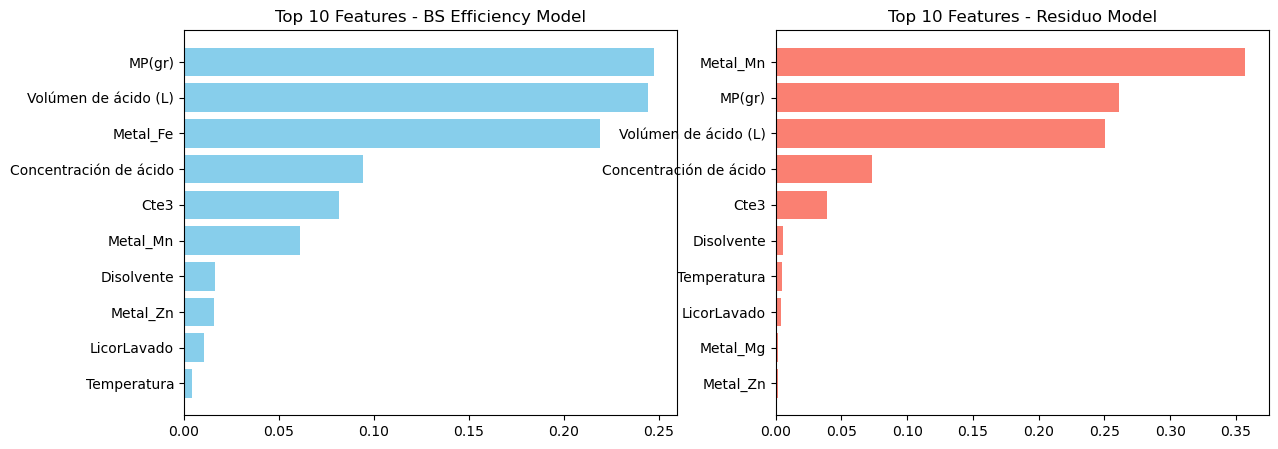

In [73]:
import matplotlib.pyplot as plt

# Get feature importances for the Efficiency Model
eff_importances = model_efficiency.feature_importances_
eff_features = X_train_eff_scaled.columns  # Assuming DataFrame, adjust if using numpy array
eff_importance_df = pd.DataFrame({'Feature': eff_features, 'Importance': eff_importances})
eff_importance_df = eff_importance_df.sort_values(by='Importance', ascending=False)

# Get feature importances for the Residuo Model
res_importances = model_residuo.feature_importances_
res_features = X_train_res_scaled.columns  # Assuming DataFrame, adjust if using numpy array
res_importance_df = pd.DataFrame({'Feature': res_features, 'Importance': res_importances})
res_importance_df = res_importance_df.sort_values(by='Importance', ascending=False)

# Print top features
print("\n### Top Features for BS Efficiency Model ###")
print(eff_importance_df.head(10))  # Top 10 features

print("\n### Top Features for Residuo Model ###")
print(res_importance_df.head(10))  # Top 10 features

# Plot feature importances
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].barh(eff_importance_df['Feature'][:10], eff_importance_df['Importance'][:10], color='skyblue')
axes[0].invert_yaxis()
axes[0].set_title("Top 10 Features - BS Efficiency Model")

axes[1].barh(res_importance_df['Feature'][:10], res_importance_df['Importance'][:10], color='salmon')
axes[1].invert_yaxis()
axes[1].set_title("Top 10 Features - Residuo Model")

plt.show()

In [74]:
# Check the feature names in the scaler
print("Scaler features:", scaler_eff.feature_names_in_)



Scaler features: ['MP(gr)' 'Cantidad Total(gr)' 'Tiempo' 'Temperatura' 'Disolvente' 'Cte3'
 'LicorLavado' 'Concentración de ácido' 'Volúmen de ácido (L)' 'Metal_Fe'
 'Metal_Mg' 'Metal_Mn' 'Metal_Zn']
